<a href="https://colab.research.google.com/github/tsiligardi/PRA3024-Analysis-of-big-data-in-physics/blob/main/GWDA_Ex_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 3**

In [3]:
import sys
!{sys.executable} -m pip install lalsuite pycbc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 60.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 KB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 72.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 KB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     

In [4]:
#Import the usefull libraries
%matplotlib inline
import pylab
import lal
from pycbc.filter import highpass,matched_filter,sigmasq
from pycbc.conversions import mass1_from_mchirp_q
from pycbc.catalog import Merger
from pycbc.frame import read_frame
from pycbc.filter import resample_to_delta_t, highpass
import numpy as np
from pycbc import types
from pycbc.waveform import get_td_waveform,get_fd_waveform
from pycbc.waveform import td_approximants, fd_approximants
import pycbc.psd
from pycbc.psd import interpolate


**Part 1**
<br>The horizon distance of a GW detector is defined as a distance to the source for which
the accumulated signal power (optimal SNR) is equal to a detection threshold of SNR
(ρmin = 8) when the source is located overhead (θ = 0,π). Plot the horizon distance
for Advanced LIGO detector (assuming ’H1’ noise PSD) assuming a set of equal mass
binary with a range of component masses between 5 to 500. In this plot, you can
assume that X-axis and Y-axis represent the total mass of the binary and horizon
distance, respectively

In [60]:
flow = 20  # set up the lower cut off frequency 
delta_f = 1.0 / 16 
flen = int(2048.0/ (delta_f)) + 1 
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow) 
psd.data[:int(flow/delta_f)] = np.inf  #set the value outside the frequency range to infinity 
psd.data[-1] = np.inf 

In [62]:
help(pycbc.psd.aLIGOZeroDetHighPower)

Help on function aLIGOZeroDetHighPower in module pycbc.psd.analytical:

aLIGOZeroDetHighPower(length, delta_f, low_freq_cutoff)
    Return a FrequencySeries containing the aLIGOZeroDetHighPower PSD from LALSimulation.



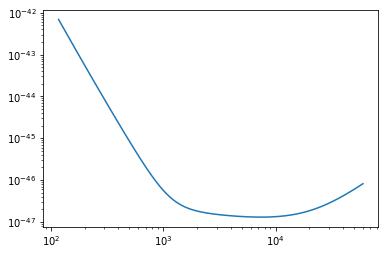

In [57]:
x=np.linspace(0,60000,flen)
pylab.loglog(x,psd); #not sure if the graph is correct

In [ ]:
#Calculating the SNR at 1000MPc
mass1 = np.arange(5, 500,1 ) #For testing just one, to speed up the code
mass2=mass1
SNRs=[]
for m in mass1:
  #generating the waveform
  hp, hc = get_fd_waveform(approximant="TaylorF2", 
                         mass1=m, 
                         mass2=m, 
                         delta_f=delta_f , 
                         distance = 1000,  
                         f_lower=20.0, f_final = 2048.0)
  
  
  #calculating the SNR
  SNR=(sigmasq(hp,psd))**0.5
  SNRs.append(SNR)


Since $D∝\frac{1}{\rho}$, I can calculate the horizon distance $H$ as follow:
<br>$H⋅8=1000Mp \cdot \rho \therefore H=(\frac{1000Mp \cdot \rho}{8})$

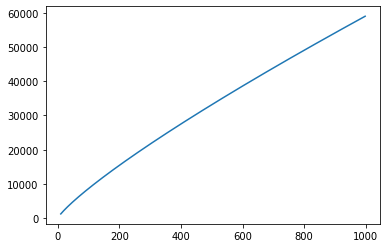

In [65]:
#calculating the horizon distances
H=[(1000*SNR)/8 for SNR in SNRs]
#calculating the total masses
m_tot=2*mass1

#plot
pylab.plot(m_tot,H);

In [64]:
max(H)

58956.05699456458